Построение модели классификации картинок на основе knn, написанного с нуля

In [410]:
import numpy as np
import pandas as pd

In [411]:
from PIL import Image

import os

data_path = './monkeys/training/training'

labels = os.listdir(data_path)

X = []
y = []

for label in labels:
    for file in os.listdir(os.path.join(data_path, label)):
        img = Image.open(os.path.join(data_path, label, file))
        img = img.resize((100, 100))
        img = np.array(img)
        X.append(img)
        y.append(label)
X = np.array(X)


In [412]:
class Knn:
    def __init__(self, k):
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        y_pred = []
        
        for x in X_test:
            distances = []
            
            for x_train in self.X_train:
                distances.append(np.linalg.norm(x - x_train))
            
            k_nearest = np.argsort(distances)[:self.k]
            
            k_nearest_labels = [self.y_train[i] for i in k_nearest]
            stats = {}
            
            for label in k_nearest_labels:
                if label not in stats:
                    stats[label] = 1
                else:
                    stats[label] += 1
                    
            y_pred.append(max(stats, key=stats.get))
        
        return np.array(y_pred)

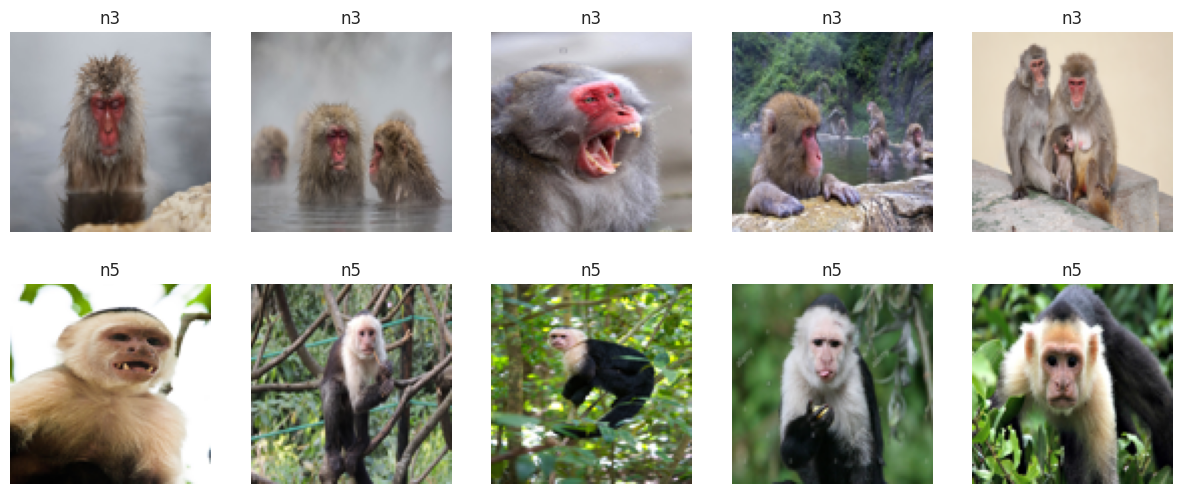

In [413]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 5, figsize=(15, 6))

for i in range(2):
    for j in range(5):
        axes[i, j].imshow(X[i*500 + j])
        axes[i, j].set_title(y[i*500 + j])
        axes[i, j].axis('off')
        
plt.show()

In [414]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.reshape(X.shape[0], -1), y, test_size=0.2, random_state=42, stratify=y)

X_train.shape, X_test.shape

((878, 30000), (220, 30000))

In [415]:
from sklearn.metrics import confusion_matrix

# use all features
for k in [3, 5, 7, 11]:
    knn = Knn(k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print(f'k = {k}')
    print(confusion_matrix(y_test, y_pred))
    print()

k = 3
[[ 6  1  1  1  0  2  5  1  3  1]
 [ 1  4  3  0  2  1  3  0  8  0]
 [ 2  0  4  0  2  1  2  2  9  0]
 [ 0  1  7  3  0  0  0  0 13  1]
 [ 1  0  2  5  2  0  2  0  9  0]
 [ 3  0  3  1  4  4  2  0  5  1]
 [ 1  2  1  0 10  2  3  0  2  0]
 [ 1  2  4  0  6  0  0  2  8  0]
 [ 0  0  6  2  2  0  3  0  8  0]
 [ 1  1  2  0  2  4  3  3  3  2]]
k = 5
[[ 4  0  0  1  3  2  4  0  6  1]
 [ 0  3  0  0  6  1  1  0 11  0]
 [ 1  1  4  0  3  0  2  2  9  0]
 [ 0  0  5  5  2  0  0  0 12  1]
 [ 1  0  1  4  4  1  1  0  9  0]
 [ 3  0  5  1  5  3  0  0  6  0]
 [ 1  1  4  0  9  0  2  0  4  0]
 [ 0  1  4  0  7  0  0  1 10  0]
 [ 0  0  3  0 11  0  0  0  7  0]
 [ 1  1  1  0  2  2  3  2  6  3]]
k = 7
[[ 5  1  0  1  1  2  5  0  5  1]
 [ 1  1  1  0  4  0  1  0 14  0]
 [ 1  1  4  0  5  1  1  2  7  0]
 [ 0  1  1  5  3  0  0  0 14  1]
 [ 3  0  0  4  3  1  0  0 10  0]
 [ 4  1  3  1  8  1  1  0  4  0]
 [ 1  1  5  0  8  0  2  0  4  0]
 [ 2  0  1  2  9  0  0  0  9  0]
 [ 2  0  1  0 10  0  1  0  7  0]
 [ 1  2  1  1  5  2  1 

In [416]:
# use only random 100 features
for k in [3, 5, 7, 11]:
    knn = Knn(k)
    random_features = np.random.choice(X_train.shape[1], 100)
    
    knn.fit(X_train[:, random_features], y_train)
    y_pred = knn.predict(X_test[:, random_features])
    
    print(f'k = {k}')
    print(confusion_matrix(y_test, y_pred))
    print()

k = 3
[[ 7  1  1  1  2  1  4  0  3  1]
 [ 1  4  7  0  0  3  2  0  5  0]
 [ 0  1  6  1  4  3  4  0  0  3]
 [ 0  1  3  3  4  1  1  0 11  1]
 [ 3  1  4  4  1  0  2  0  6  0]
 [ 4  1  4  1  2  5  4  0  0  2]
 [ 0  3  6  1  4  0  3  0  4  0]
 [ 2  1  5  0  8  1  0  1  5  0]
 [ 3  0  3  1  5  0  1  1  7  0]
 [ 1  0  3  2  4  2  2  1  4  2]]
k = 5
[[ 5  2  2  2  2  4  3  0  1  0]
 [ 0  2  5  1  8  1  0  0  5  0]
 [ 2  1  2  0  4  0  3  2  8  0]
 [ 0  3  2  3  4  0  0  0 11  2]
 [ 3  0  0  4  5  0  1  0  7  1]
 [ 2  0  5  1  5  4  3  1  2  0]
 [ 2  1  1  1  9  0  2  2  3  0]
 [ 2  1  6  2  3  1  0  0  8  0]
 [ 0  0  2  0  4  0  2  0 13  0]
 [ 2  0  3  0  3  2  4  3  3  1]]
k = 7
[[ 1  4  2  2  3  2  4  0  3  0]
 [ 0  2  3  1  2  2  2  0 10  0]
 [ 1  0  5  1  4  1  0  2  7  1]
 [ 0  1  8  3  3  0  1  1  6  2]
 [ 3  0  6  3  0  0  0  0  8  1]
 [ 3  0  5  2  7  1  1  0  4  0]
 [ 1  0  4  1  6  0  2  0  7  0]
 [ 1  0  6  2  7  1  0  0  6  0]
 [ 0  1  4  1  6  0  0  0  9  0]
 [ 0  2  3  1  4  2  2 

Наилучшее качество достигается при k = 11 и при использовании всех признаков

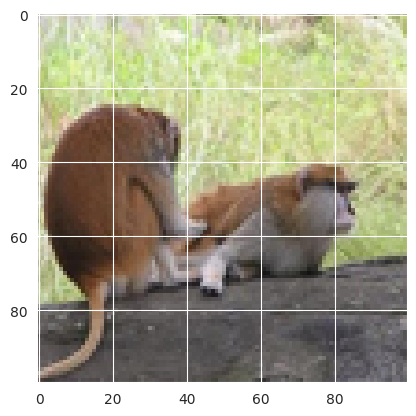

In [417]:
validate_pic = Image.open('./monkeys/validation/validation/n1/n100.jpg')

validate_pic = validate_pic.resize((100, 100))

validate_pic = np.array(validate_pic)

plt.imshow(validate_pic)

plt.show()

In [418]:
knn = Knn(11)

knn.fit(X_train, y_train)

y_pred = knn.predict(validate_pic.reshape(1, -1))

y_pred


array(['n2'], dtype='<U2')

# Обновленный датасет

In [440]:
df = pd.read_csv('./hespe/data.csv')

df.describe()

,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,COURSE ID,GRADE
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,...,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,1.620690,1.600000,1.944828,3.572414,1.662069,1.600000,1.579310,1.627586,1.620690,1.731034,...,1.337931,1.165517,2.544828,2.055172,2.393103,1.806897,3.124138,2.724138,4.131034,3.227586
std,0.613154,0.491596,0.537216,0.805750,0.474644,0.491596,0.495381,1.020245,1.061112,0.783999,...,0.614870,0.408483,0.564940,0.674736,0.604343,0.810492,1.301083,0.916536,3.260145,2.197678
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,...,1.000000,1.000000,3.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000
75%,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,1.000000,3.000000,3.000000,3.000000,2.000000,4.000000,3.000000,7.000000,5.000000
max,3.000000,2.000000,3.000000,5.000000,2.000000,2.000000,2.000000,5.000000,4.000000,4.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,5.000000,4.000000,9.000000,7.000000


In [441]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   STUDENT ID  145 non-null    object
 1   1           145 non-null    int64 
 2   2           145 non-null    int64 
 3   3           145 non-null    int64 
 4   4           145 non-null    int64 
 5   5           145 non-null    int64 
 6   6           145 non-null    int64 
 7   7           145 non-null    int64 
 8   8           145 non-null    int64 
 9   9           145 non-null    int64 
 10  10          145 non-null    int64 
 11  11          145 non-null    int64 
 12  12          145 non-null    int64 
 13  13          145 non-null    int64 
 14  14          145 non-null    int64 
 15  15          145 non-null    int64 
 16  16          145 non-null    int64 
 17  17          145 non-null    int64 
 18  18          145 non-null    int64 
 19  19          145 non-null    int64 
 20  20        

In [442]:
target_col = 'GRADE' # predict if it's 0 or not 0

Удалим колонку COURSE ID, так как данных для обучения слишком мало и мы не можем
позволить себе обучаться для каждого курса отдельно

In [443]:
df.drop('COURSE ID', axis=1, inplace=True)
df.drop('STUDENT ID', axis=1, inplace=True)

In [444]:
import seaborn as sns

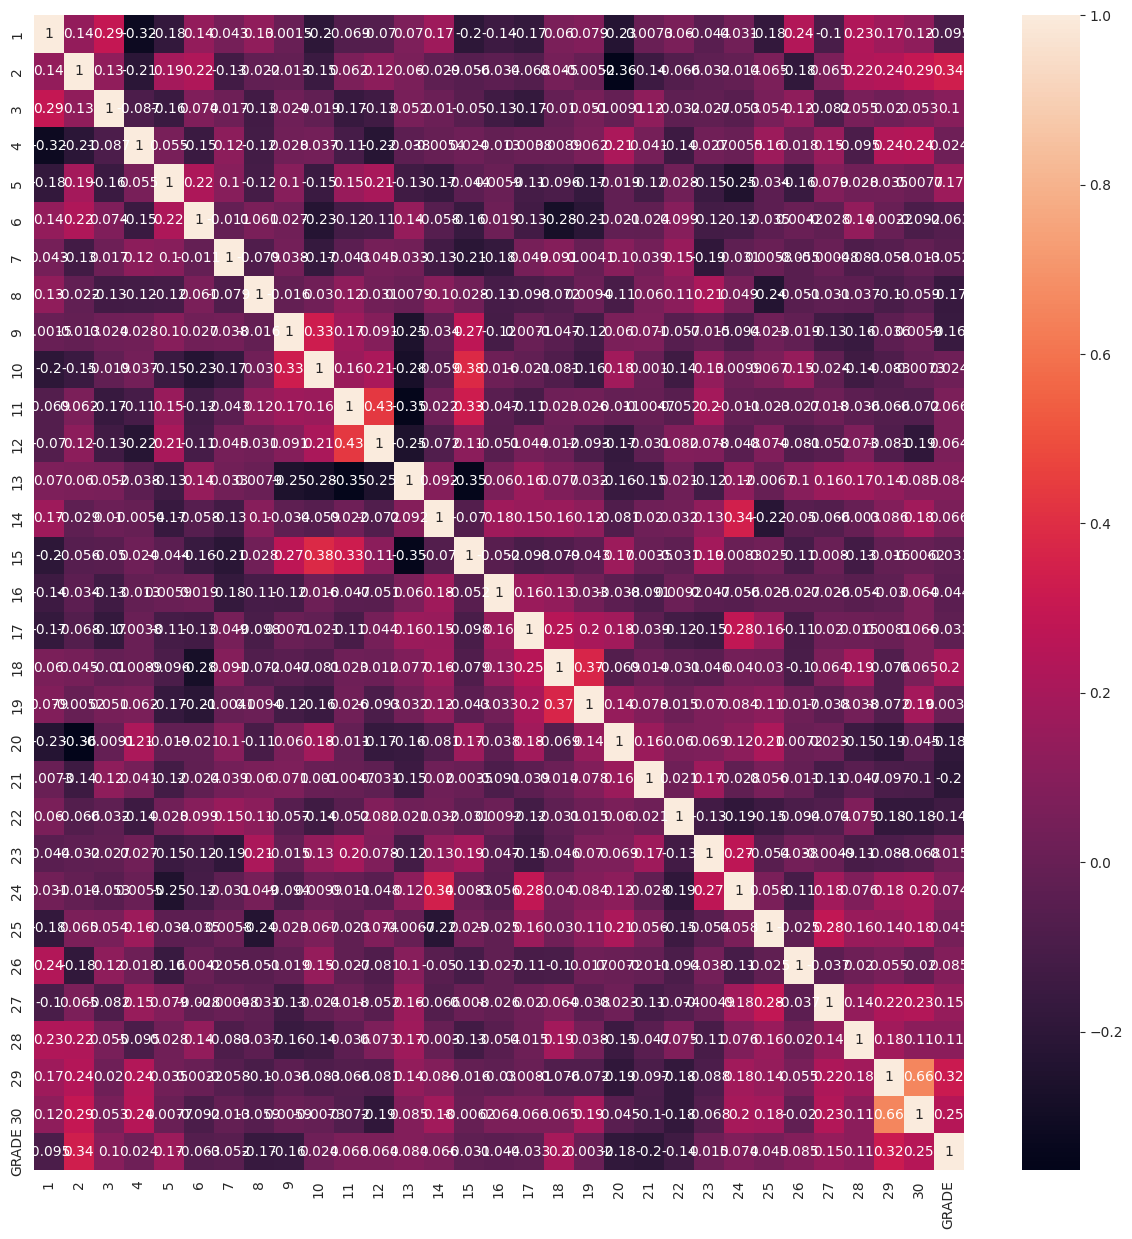

In [445]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True)
plt.show()


Как мы видим, фича 29 и 30 сильно коррелируют между собой удалим одну из них

In [446]:
df.drop('29', axis=1, inplace=True)

Также дропнем бесполезные фичи

In [447]:
df.drop('7', axis=1, inplace=True)
df.drop('16', axis=1, inplace=True)
df.drop('6', axis=1, inplace=True)
df.drop('26', axis=1, inplace=True)
df.drop('14', axis=1, inplace=True)

In [448]:
df[target_col].value_counts()

GRADE
1    35
2    24
3    21
5    17
7    17
6    13
4    10
0     8
Name: count, dtype: int64

<Figure size 640x480 with 0 Axes>

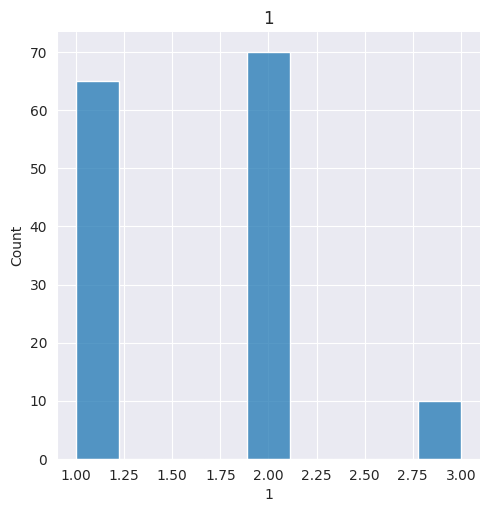

<Figure size 640x480 with 0 Axes>

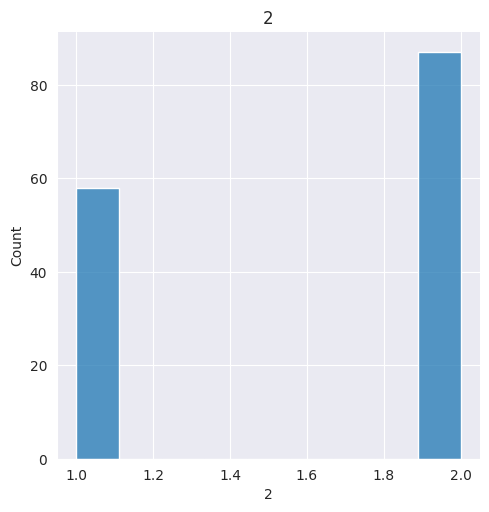

<Figure size 640x480 with 0 Axes>

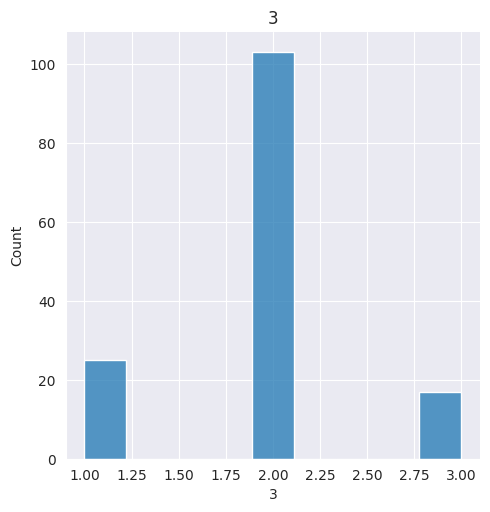

<Figure size 640x480 with 0 Axes>

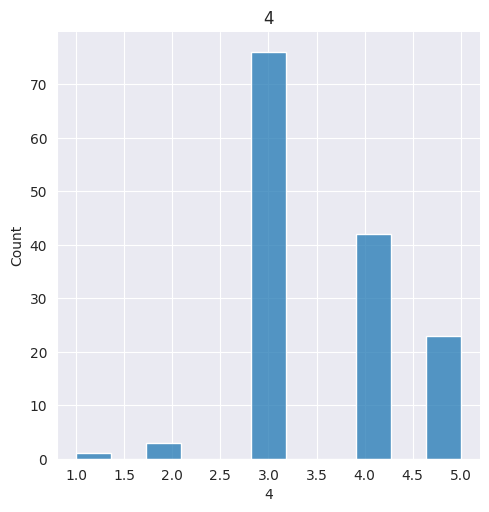

<Figure size 640x480 with 0 Axes>

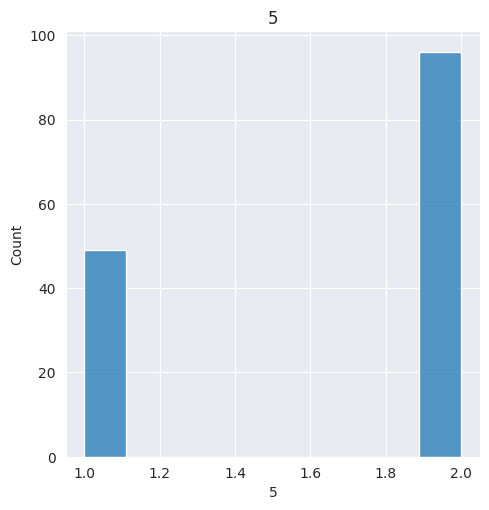

<Figure size 640x480 with 0 Axes>

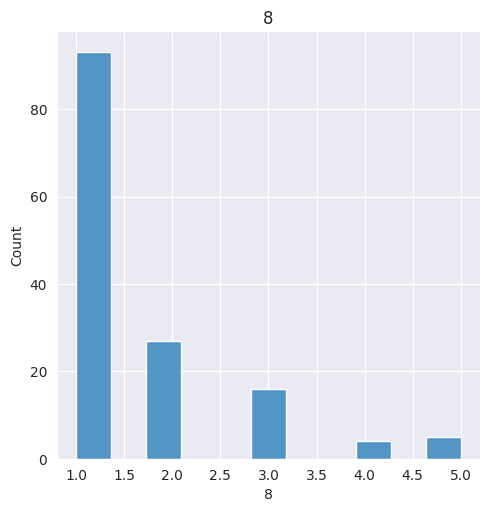

<Figure size 640x480 with 0 Axes>

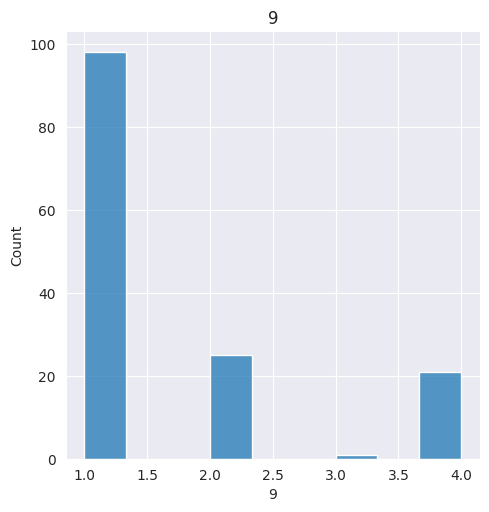

<Figure size 640x480 with 0 Axes>

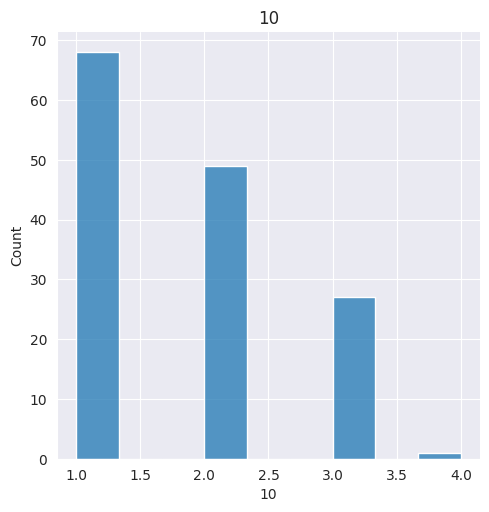

<Figure size 640x480 with 0 Axes>

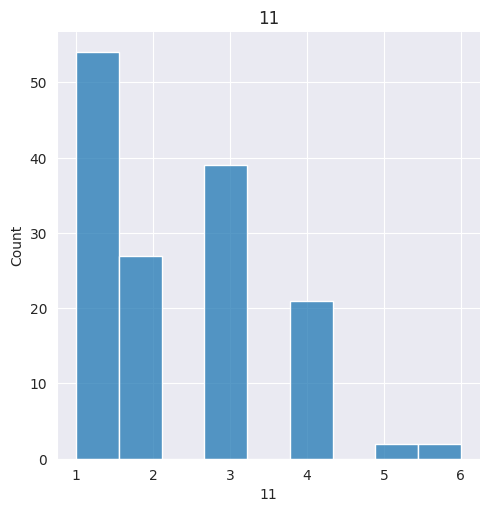

<Figure size 640x480 with 0 Axes>

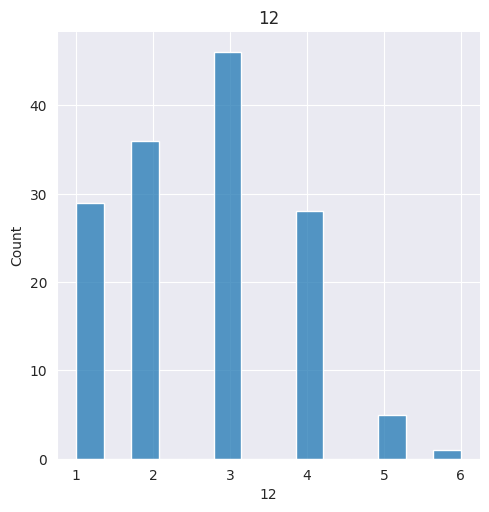

<Figure size 640x480 with 0 Axes>

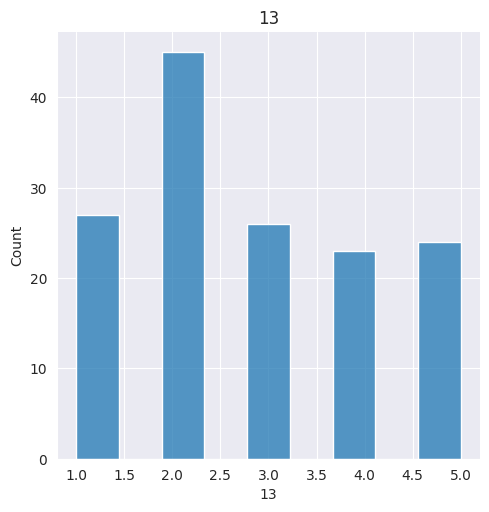

<Figure size 640x480 with 0 Axes>

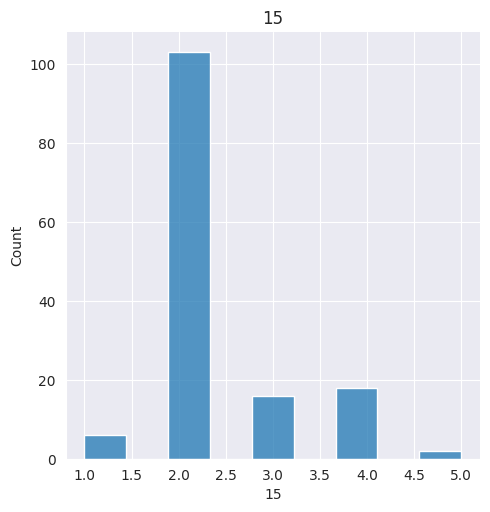

<Figure size 640x480 with 0 Axes>

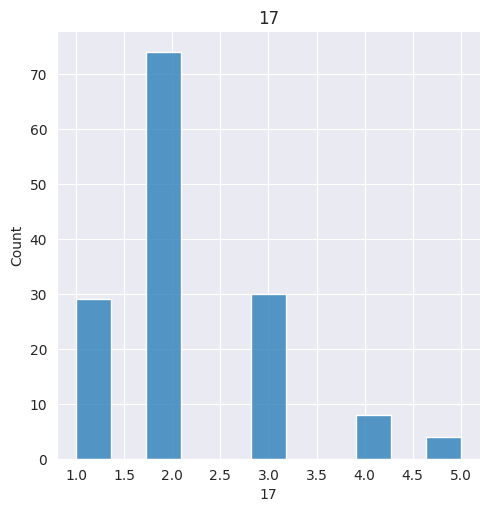

<Figure size 640x480 with 0 Axes>

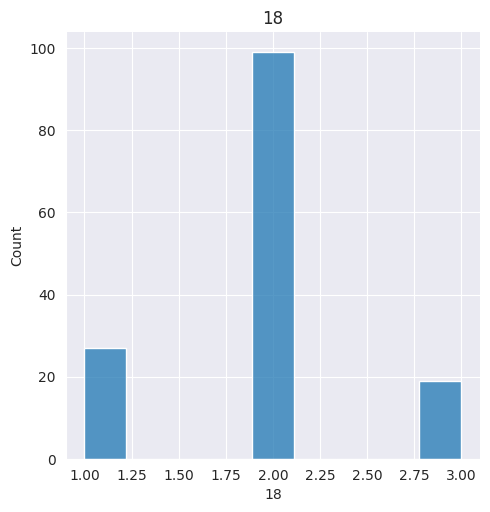

<Figure size 640x480 with 0 Axes>

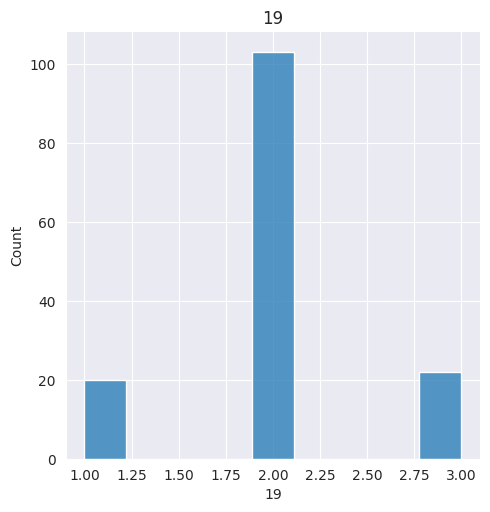

<Figure size 640x480 with 0 Axes>

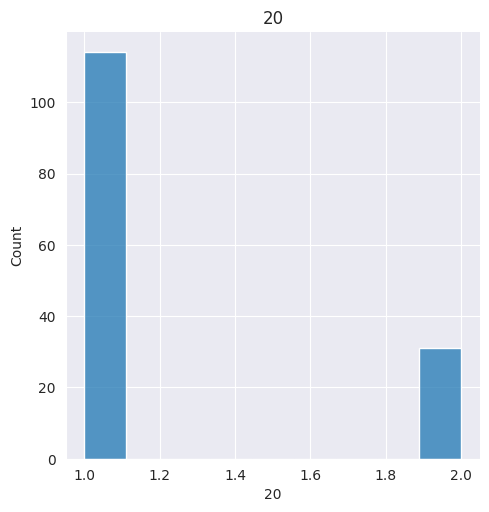

<Figure size 640x480 with 0 Axes>

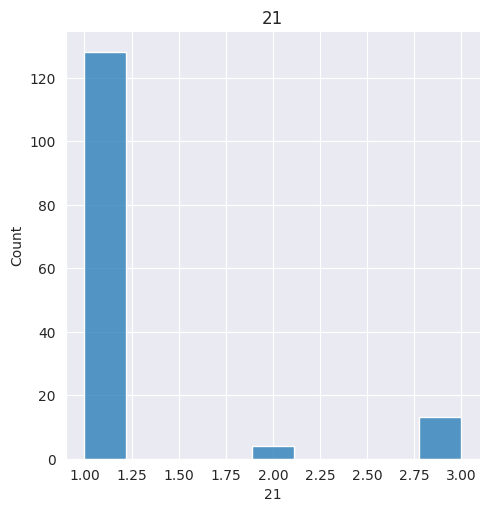

<Figure size 640x480 with 0 Axes>

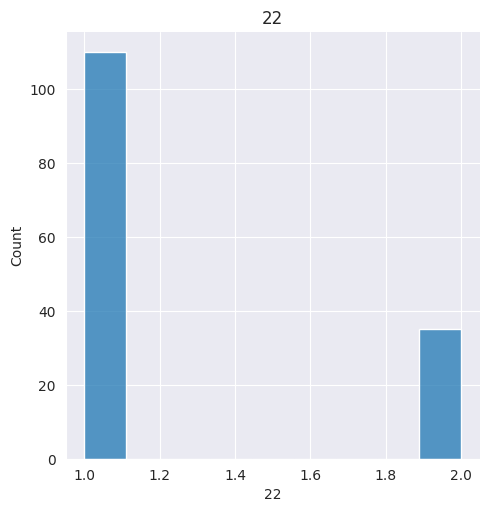

<Figure size 640x480 with 0 Axes>

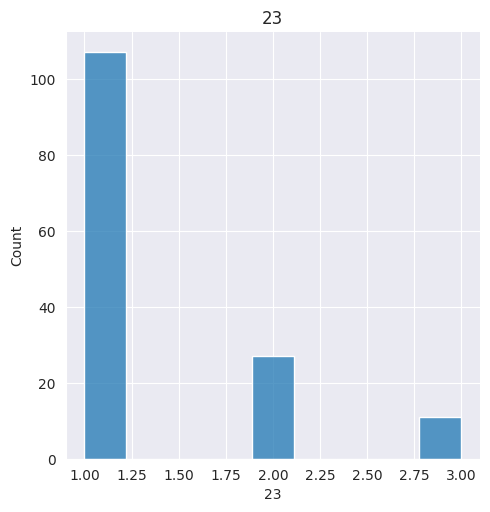

<Figure size 640x480 with 0 Axes>

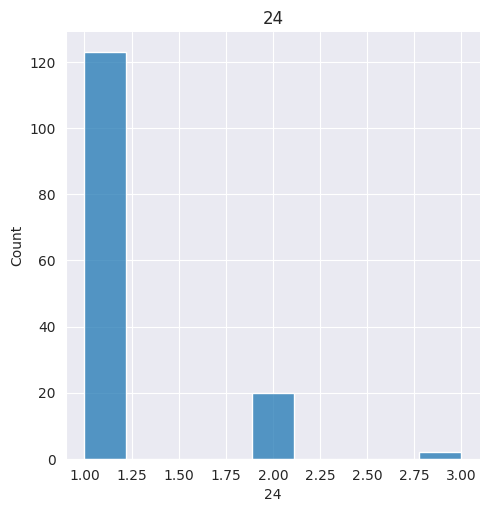

<Figure size 640x480 with 0 Axes>

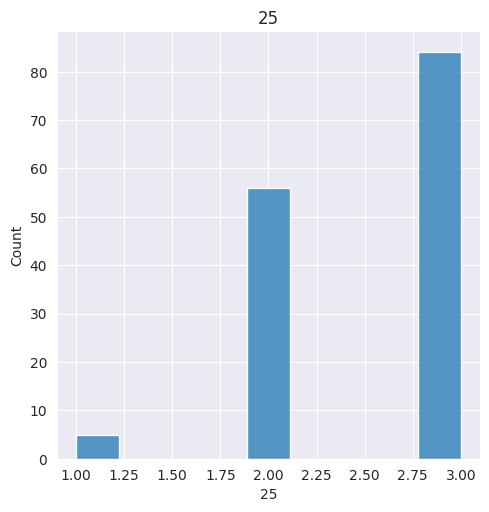

<Figure size 640x480 with 0 Axes>

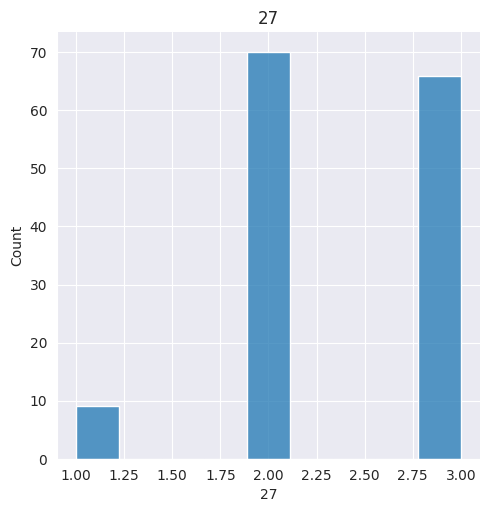

<Figure size 640x480 with 0 Axes>

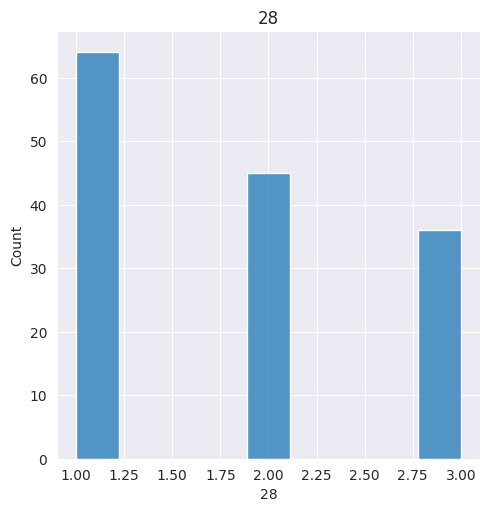

<Figure size 640x480 with 0 Axes>

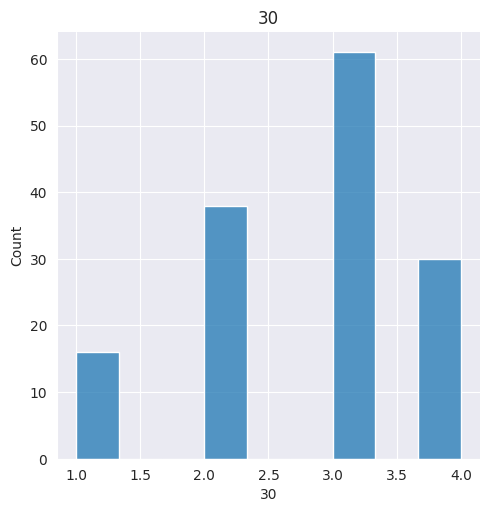

<Figure size 640x480 with 0 Axes>

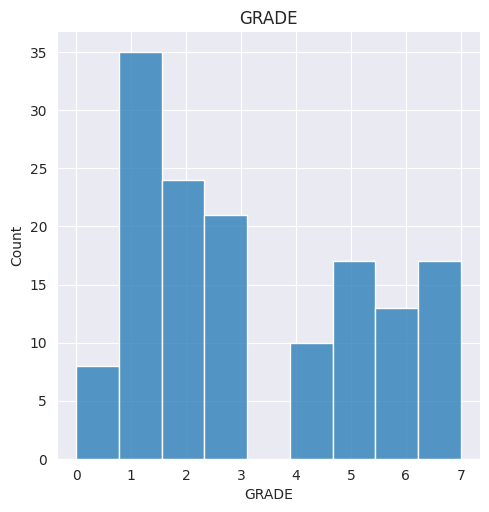

In [449]:
for col in df.columns:
    plt.figure()
    sns.displot(df[col])
    plt.title(col)
    plt.show()

Нормируем данные по minmax

In [450]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1       145 non-null    int64
 1   2       145 non-null    int64
 2   3       145 non-null    int64
 3   4       145 non-null    int64
 4   5       145 non-null    int64
 5   8       145 non-null    int64
 6   9       145 non-null    int64
 7   10      145 non-null    int64
 8   11      145 non-null    int64
 9   12      145 non-null    int64
 10  13      145 non-null    int64
 11  15      145 non-null    int64
 12  17      145 non-null    int64
 13  18      145 non-null    int64
 14  19      145 non-null    int64
 15  20      145 non-null    int64
 16  21      145 non-null    int64
 17  22      145 non-null    int64
 18  23      145 non-null    int64
 19  24      145 non-null    int64
 20  25      145 non-null    int64
 21  27      145 non-null    int64
 22  28      145 non-null    int64
 23  30      145 non

In [451]:
df[target_col]

0      1
1      1
2      1
3      1
4      1
      ..
140    5
141    5
142    1
143    4
144    3
Name: GRADE, Length: 145, dtype: int64

In [452]:
target_col = 'IS_PASSED'
df[target_col] = df['GRADE'].apply(lambda x: 1 if x > 3 else 0)
df.drop('GRADE', axis=1, inplace=True)

In [453]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(target_col, axis=1), df[target_col].values, test_size=0.2, random_state=42, stratify=df[target_col].values)

X_train.shape, X_test.shape

((116, 24), (29, 24))

In [454]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [455]:
len(X_train), len(y_train)

(116, 116)

In [456]:
y_train

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0])

In [457]:
def normalize_data_minmax(data):
    return (data - data.min()) / (data.max() - data.min())

X_train = normalize_data_minmax(X_train)
X_test = normalize_data_minmax(X_test)

In [458]:
from sklearn.metrics import confusion_matrix

# use all features
for k in [3, 5, 7, 11, 15]:
    knn = Knn(k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print(y_pred)
    print(f'k = {k}')
    print(confusion_matrix(y_test, y_pred))
    print()    

[1 1 0 0 0 1 1 0 1 0 1 0 0 1 1 1 0 1 1 0 1 0 1 0 1 0 1 1 1]
k = 3
[[9 9]
 [3 8]]

[1 1 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1]
k = 5
[[10  8]
 [ 4  7]]

[1 1 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 1]
k = 7
[[12  6]
 [ 4  7]]

[1 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 1 0 0 0 1 1 0 1 1 0 0 1]
k = 11
[[11  7]
 [ 5  6]]

[0 1 1 0 0 0 1 0 1 0 1 1 0 1 1 0 0 1 0 0 0 0 1 0 1 1 0 0 1]
k = 15
[[10  8]
 [ 6  5]]


In [459]:
# use only random 10 features
    
for k in [3, 5, 7, 11, 15]:
    knn = Knn(k)
    random_features = np.random.choice(X_train.shape[1], 10)
    
    knn.fit(X_train[:, random_features], y_train)
    y_pred = knn.predict(X_test[:, random_features])
    
    print(f'k = {k}')
    print(confusion_matrix(y_test, y_pred))
    print()

k = 3
[[14  4]
 [ 4  7]]

k = 5
[[ 8 10]
 [10  1]]

k = 7
[[11  7]
 [ 8  3]]

k = 11
[[12  6]
 [ 7  4]]

k = 15
[[9 9]
 [3 8]]


In [460]:
# use only 30th feature

knn = Knn(11)

knn.fit(X_train[:, -1].reshape(-1, 1), y_train)

y_pred = knn.predict(X_test[:, -1].reshape(-1, 1))

print(confusion_matrix(y_test, y_pred))

[[18  0]
 [ 8  3]]
